In [2]:
!pip install --upgrade pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/ab/63/966db1321a0ad55df1d1fe51505d2cdae191b84c907974873817b0a6e849/pandas-2.2.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.6 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.5/11.6 MB 4.9 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/11.6 MB 6.5 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/11.6 MB 8.0 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/11.6 MB 8.9 MB/s eta 0:00:02
   --------- ------------------------------ 2.7/11.6 MB 9.6 MB/s eta 0:00:01
   ----------- ---------------------------- 3.3/11.6 MB 10.1 MB/s eta 0:00:01
   ------------- -------------------------- 3.9/11.6 MB 10.5 MB/s eta 0:00:01
   --------------- ------------------------ 4.5/11.6 MB 11.2 MB/s eta 0:00:01
   ----------------- -------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Raoul\\anaconda3\\Lib\\site-packages\\~.ndas.libs\\msvcp140-ef6047a69b174ada5cb2eff1d2bc9a62.dll'
Consider using the `--user` option or check the permissions.



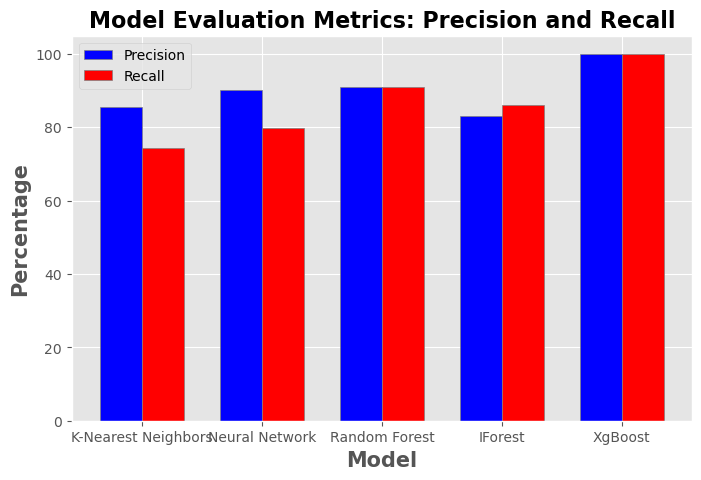

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Preparation
data = {
    'Model': ['K-Nearest Neighbors', 'Neural Network', 'Random Forest', "IForest", "XgBoost"],
    'Precision': [85.47, 90.14, 91.00, 83.22, 100.00],
    'Recall': [74.48, 79.84, 91.00,  86.09, 99.99]
}

df = pd.DataFrame(data)

# Set the style for aesthetic purposes
plt.style.use('ggplot')

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))

# Width of a bar
width = 0.35  

# Setting position of bars on X axis
r1 = range(len(df))
r2 = [x + width for x in r1]

# Creating the bars
precision_bars = ax.bar(r1, df['Precision'], color='blue', width=width, edgecolor='grey', label='Precision')
recall_bars = ax.bar(r2, df['Recall'], color='red', width=width, edgecolor='grey', label='Recall')

# Adding labels
ax.set_xlabel('Model', fontweight='bold', fontsize=15)
ax.set_ylabel('Percentage', fontweight='bold', fontsize=15)
ax.set_title('Model Evaluation Metrics: Precision and Recall', fontweight='bold', fontsize=16)
ax.set_xticks([r + width/2 for r in range(len(df))])
ax.set_xticklabels(df['Model'])

# Create legend & Show graphic
ax.legend()
plt.show()

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier


file_path = '../datasets/supervised_dataset.csv'
df = pd.read_csv(file_path, low_memory=False)
df = df.dropna(axis=1)
df = df.drop("Material number", axis=1)

X = df.drop('anomaly', axis=1)
y = df['anomaly']
X = X.reset_index(drop=True,)
print(X)

train_percent_index = round(len(df['anomaly'])*0.7)
print(train_percent_index)
X_train = X[:train_percent_index]
y_train = y[:train_percent_index]

X_test = X[train_percent_index:]
y_test = y[train_percent_index:]

# Identify numerical and categorical columns
categorical_cols = ["Supplier", "Contract Position", "Procurement type",  "Dispatcher", "Buyer", 
                                    "Purchasing lot size", "Plant", 
                                     "Product group",
                                    "Base unit"]
numerical_cols = ["Fulfillment time", "Fixed contract 1", "Fixed contract 2", "Total quantity", "Total value", 
                                  "Price unit", "Material master time", "Plant processing time"]


# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create and fit the KNN model within a pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

# Fit the model
model.fit(X_train, y_train)

# X_test = X_test.drop(df.columns[0], axis=1)

predictions = model.predict(X_test)
print(predictions)


C:\Users\Raoul\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


        Supplier  Contract Position  Fulfillment time  Fixed contract 1  \
0           3000                  0                 0                 0   
1           2000                  0                 0                 0   
2           2000                  0                 0                 0   
3           2000                  0                 0                 0   
4           2000                  0                 0                 0   
...          ...                ...               ...               ...   
186751    704947                 10                63                 0   
186752    700020                 10                 4                 4   
186753    701806                 10                 4                 4   
186754    701806                 10                 4                 4   
186755    701806                 10                 4                 4   

        Fixed contract 2 Procurement type  Dispatcher  Buyer  \
0                      0           

C:\Users\Raoul\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [0, 1, 3, 4, 5, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[0 1 0 ... 1 1 1]


In [5]:
def calculate_performance(predictions, y_test):
    # Calculate the percentage of matching entries
    matching_percentage = (y_test == predictions).mean() * 100
    print(f"Percentage of matching entries (accuracy): {matching_percentage:.2f}%")

    # Calculate precision components
    matching_ones = (y_test == 1) & (predictions == 1)
    amount_anomalies_in_predictions = sum(predictions == 1)
    count_matching_ones = matching_ones.sum()

    # Calculate precision
    if amount_anomalies_in_predictions > 0:
        precision = (count_matching_ones / amount_anomalies_in_predictions) * 100
    else:
        precision = 0
    print(f"Percent of matching anomalies (precision): {precision:.2f}%")

    # Calculate false negatives
    false_negatives = sum((y_test == 1) & (predictions == 0))
    print(f"Number of false negatives: {false_negatives}")

    # Calculate percentage of anomalies in predictions and validation data
    percent_anomalies_in_predictions = (amount_anomalies_in_predictions / len(predictions)) * 100
    percent_anomalies_in_validation = (sum(y_test == 1) / len(y_test)) * 100
    print(f"Percent of anomalies in predictions: {percent_anomalies_in_predictions:.2f}%")
    print(f"Percent of anomalies in validation data: {percent_anomalies_in_validation:.2f}%")
    print(f"Recall: {100*count_matching_ones/(count_matching_ones+false_negatives):.2f}%")
    print("\n")

In [6]:
import pandas as pd

data = pd.read_csv("updated_with_anomalies_xgboost_stammdaten.csv")
if_predictions = data["if_anomaly"]
xgb_predictions = data["xgb_anomaly"]
y_test = data["anomaly_label"]
calculate_performance(if_predictions, y_test)
calculate_performance(xgb_predictions, y_test)

Percentage of matching entries (accuracy): 97.97%
Percent of matching anomalies (precision): 83.22%
Number of false negatives: 1683
Percent of anomalies in predictions: 6.70%
Percent of anomalies in validation data: 6.48%
Recall: 86.09%


Percentage of matching entries (accuracy): 100.00%
Percent of matching anomalies (precision): 99.99%
Number of false negatives: 3
Percent of anomalies in predictions: 6.48%
Percent of anomalies in validation data: 6.48%
Recall: 99.98%




C:\Users\Raoul\AppData\Local\Temp\ipykernel_1608\3725513175.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("updated_with_anomalies_xgboost_stammdaten.csv")
